In [126]:
import pandas as pd
import pandas_datareader as dr
import matplotlib.pyplot as plt
import numpy as np
import warnings
from nsepy import get_history
from datetime import date
warnings.filterwarnings("ignore")
%matplotlib inline

In [127]:
#Getting Stock price data from yahoo finance using panda_datareader library
#Getting NIFTYIT Index value using nsepy library

TCS = dr.data.get_data_yahoo('TCS.NS', start = '2015-01-01', end ='2016-01-01')
INFY = dr.data.get_data_yahoo('INFY.NS', start = '2015-01-01', end ='2016-01-01')
niftyit = get_history(symbol="NIFTYIT", 
                    start=date(2015,1,1), 
                    end=date(2016,1,1),
					index=True)

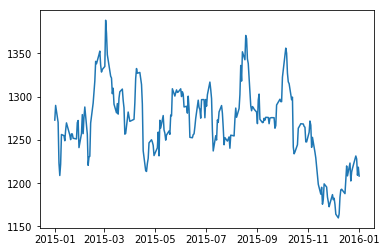

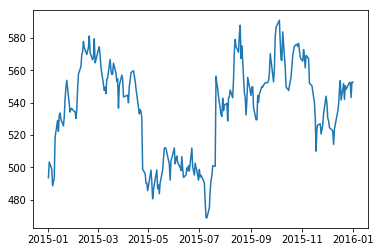

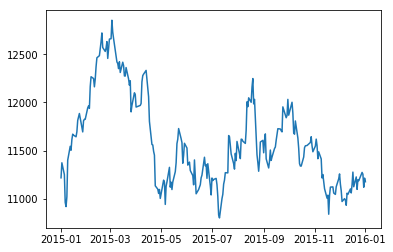

In [128]:
#Code to plot TCS, INFOSYS, NIFTY IT data set using plt(Matplot library)

plt.plot(TCS['Close'])
plt.show()
plt.plot(INFY['Close'])
plt.show()
plt.plot(niftyit['Close'])
plt.show()

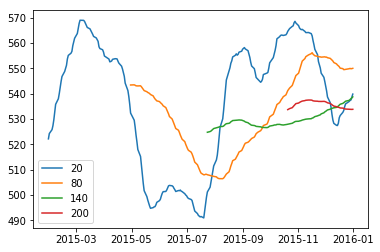

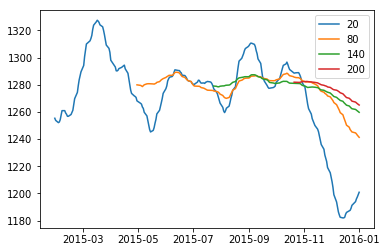

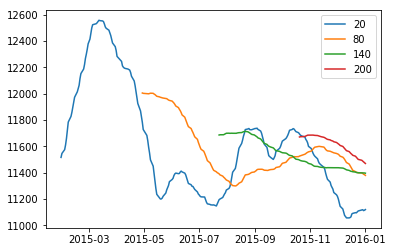

In [129]:
# for question 1, where I was supposed to calculate moving average for weeks 4(20 days), 
# 16 weeks(20+60 days), .. , 52 weeks(20+60+60+60+60-13)

def moving_avg(data):
    for i in range(20,240,60):
        data['Rolling_Mean'] = data['Close'].rolling(window = i).mean()
        plt.plot(data['Rolling_Mean'], label = i)
        plt.legend()
    plt.show()

moving_avg(INFY)
moving_avg(TCS)
moving_avg(niftyit)    

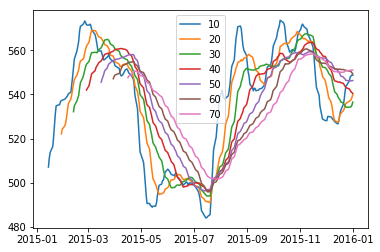

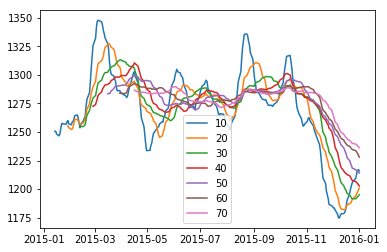

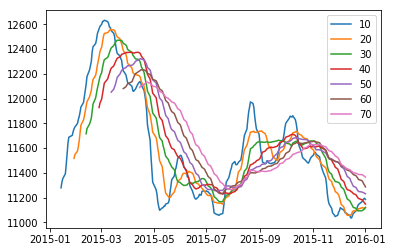

In [130]:
#Answer to the 2nd Question, where rolling window is incremented with 10 steps
#For all the stocks and index dataset.

def time_s(data):
    for i in range(10,80,10):
        data['Rolling_Mean'] = data['Close'].rolling(window = i).mean()
        plt.plot(data['Rolling_Mean'], label = i)
        plt.legend()
    plt.show()
    
time_s(INFY)
time_s(TCS)
time_s(niftyit)

In [131]:
'''Function to generate extra features like Volume Shocks, Price Shocks, Directions and 
   Pricing shock without volume shock.
Volume Shock = 'Vol_Shock'
Price Shock = 'Price_Shock'
Directions for Vol_Shock = 'direc_Vol_Shock'
Directions for Price_Shock = 'direc_Price_Shock'
Pricing shock without volume shock = 'PSWVS'

'''

def dummy_ts(data):
    Vol1 = data.Volume
    Close = data.Close

    data['Vol_Shock'] = np.zeros(len(data), dtype=float)
    data['Price_Shock'] = np.zeros(len(data), dtype=float)
    data['direc_Vol_Shock'] = np.zeros(len(data), dtype=float)
    data['direc_Price_Shock'] = np.zeros(len(data), dtype=float)
    data['PSWVS'] = np.zeros(len(data), dtype=float)
    for i in range(1,len(data)):
        k = ((Vol1[i]-Vol1[i-1])/Vol1[i-1])*100
        if(abs(k)>=10):
            data['Vol_Shock'][i] = 1
            if(k >0):
                data['direc_Vol_Shock'][i] = 1

    for j in range(1,len(data)):
        l = ((Close[j]-Close[j-1])/Close[j-1])*100
        if(abs(l)>=2):
            data['Price_Shock'][j] = 1
            if(l >0):
                data['direc_Price_Shock'][j] = 1
    
    for m in range(1,len(data)):
        if(data['Price_Shock'][m] == 1 and data['Vol_Shock'][m] == 0):
            data['PSWVS'][m] = 1 
            

            
dummy_ts(TCS)
dummy_ts(INFY)
dummy_ts(niftyit)

In [132]:
''' Feature extraction code for Volume Shock == 1,
    New DataFrame named N_TCS, N_INFY, N_NIFTYIT is selected, which follows above condition.
    And 2nd DataFrame named Ne_TCS, Ne_INFY, Ne_NIFTYIT is also selected:
    Condition for 2nd DataFrame is PSWVS == 1.
    
'''
N_TCS = TCS[TCS["Vol_Shock"] == 1]
N_INFY = INFY[INFY["Vol_Shock"] == 1]
N_NIFTYIT = niftyit[niftyit["Vol_Shock"] == 1]

Ne_TCS = TCS[TCS["PSWVS"] == 1]
Ne_INFY = INFY[INFY["PSWVS"] == 1]
Ne_NIFTYIT = niftyit[niftyit["PSWVS"] == 1]

In [133]:
#Plot function
def plot_(data,data1,data2):
    #fi,axes = plt.subplots(2,2, figsize=(16,10))
    plt.plot(data['Close'],color = 'blue');
    plt.show()
    plt.plot(data1['Close'], color = 'red');
    plt.show()
    plt.plot(data2['Close'], color = 'black');
    plt.show()

In [280]:
Ne_INFY = Ne_INFY.Close
Ne_NIFTYIT = Ne_NIFTYIT.Close
Ne_TCS = Ne_TCS

In [ ]:
def 
data = data.reset_index()
data = data.drop(columns = ['Date'])

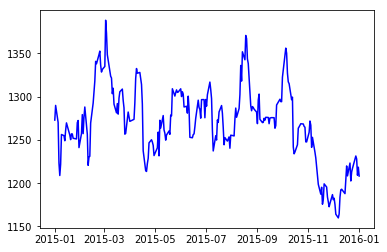

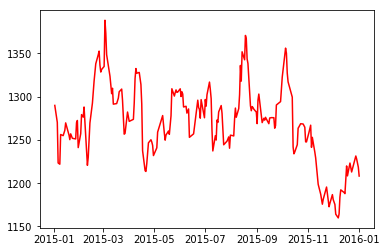

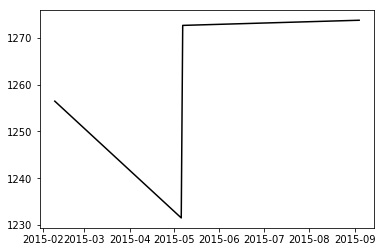

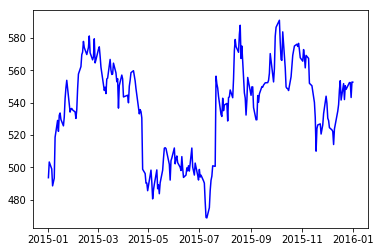

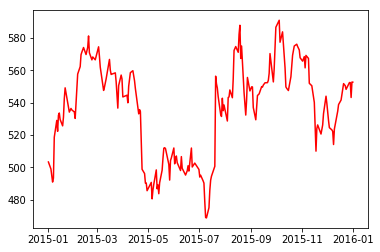

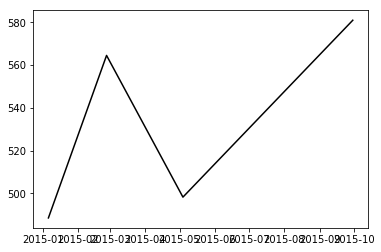

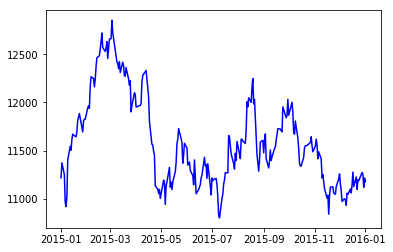

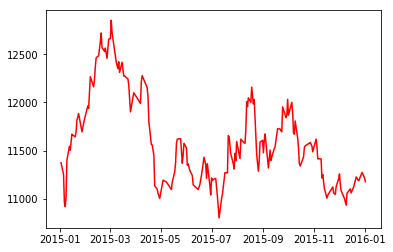

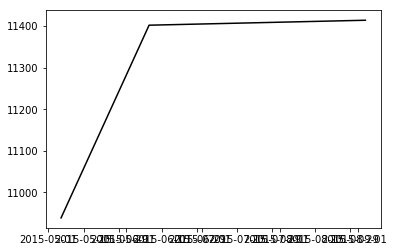

In [134]:
plot_(TCS,N_TCS,Ne_TCS)
plot_(INFY,N_INFY,Ne_INFY)
plot_(niftyit,N_NIFTYIT,Ne_NIFTYIT)

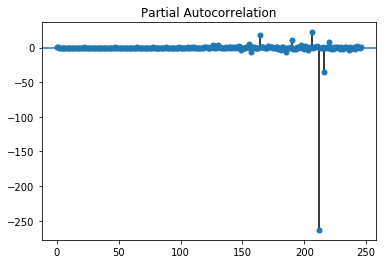

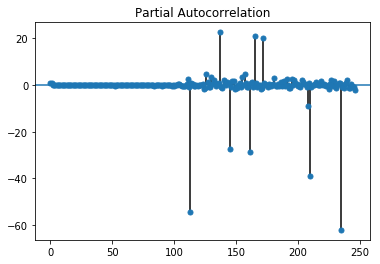

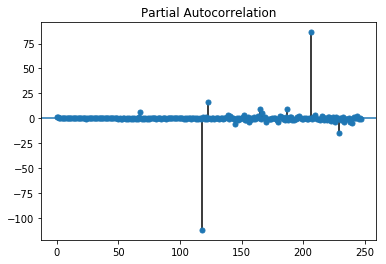

In [135]:
#Partial Auto-correlation Plotting for TCS, Infosys stocks and NIFTYIT index

from statsmodels.graphics.tsaplots import plot_pacf
def plot_partial_correlation(data):
    plot_pacf(data['Close'], lags=247)
    plt.show()

plot_partial_correlation(TCS)
plot_partial_correlation(INFY)
plot_partial_correlation(niftyit)

In [237]:
#Application of Regression Model, I have decide to use panda library and shift model data 1 and 2 units
#The approach that Closing Price data regress with itself, only Closing prices are selected for traindata

Y_train_tcs = TCS.Close
Y_train_infy = INFY.Close
Y_train_niftyit = niftyit.Close

In [238]:
#Training Data set are shifted by 1 and 2 units, for all 3 data sets
# Thus, total data set now is 2 for all three cases

X_train_tcs1 = Y_train_tcs.shift(periods = 1)
X_train_tcs2 = Y_train_tcs.shift(periods = 2)
X_train_infy1 = Y_train_infy.shift(periods = 1)
X_train_infy2 = Y_train_infy.shift(periods = 2)
X_train_niftyit1 = Y_train_niftyit.shift(periods = 1)
X_train_niftyit2 = Y_train_niftyit.shift(periods = 2)

In [239]:
#dropping NAN values from the training data_Set, which are 1 or 2 order shifted

X_train_tcs1 = X_train_tcs1.dropna()
X_train_tcs2 = X_train_tcs2.dropna()
X_train_infy1 = X_train_infy1.dropna()
X_train_infy2 = X_train_infy2.dropna()
X_train_niftyit1 = X_train_niftyit1.dropna()
X_train_niftyit2 = X_train_niftyit2.dropna()

In [241]:
#Removal of date from index and Column named data from all three stocks/index
#For Y data set

Y_train_tcs = Y_train_tcs.reset_index()
Y_train_tcs = Y_train_tcs.drop(columns = ['Date'])

In [242]:
Y_train_infy = Y_train_infy.reset_index()
Y_train_infy = Y_train_infy.drop(columns = ['Date'])
Y_train_niftyit = Y_train_niftyit.reset_index()
Y_train_niftyit = Y_train_niftyit.drop(columns = ['Date'])

In [243]:
#traing dataset for condition 1 and 2, here one has shift =1 and 2 has shift = 2
#Removal of date from index and Column named data from all three stocks/index for training data set
#For X data set

X_train_tcs1 = X_train_tcs1.reset_index()
X_train_tcs1 = X_train_tcs1.drop(columns = ['Date'])
X_train_tcs2 = X_train_tcs2.reset_index()
X_train_tcs2 = X_train_tcs2.drop(columns = ['Date'])
X_train_infy1 = X_train_infy1.reset_index()
X_train_infy1 = X_train_infy1.drop(columns = ['Date'])
X_train_infy2 = X_train_infy2.reset_index()
X_train_infy2 = X_train_infy2.drop(columns = ['Date'])
X_train_niftyit1 = X_train_niftyit1.reset_index()
X_train_niftyit1 = X_train_niftyit1.drop(columns = ['Date'])
X_train_niftyit2 = X_train_niftyit2.reset_index()
X_train_niftyit2 = X_train_niftyit2.drop(columns = ['Date'])

In [244]:
#Removal of first and second row from 'Y' dataset, for application of Regression models

Y_train_tcs1 =Y_train_tcs.iloc[1:]
Y_train_tcs2 = Y_train_tcs1.iloc[1:]
Y_train_infy1 = Y_train_infy.iloc[1:]
Y_train_infy2 = Y_train_infy1.iloc[1:]
Y_train_niftyit1 = Y_train_niftyit.iloc[1:]
Y_train_niftyit2 = Y_train_niftyit1.iloc[1:]

In [252]:
#Building of training and testing data set, with last 50 'Closing Price Value' in test
#And first 196, 195, 198 or 197 data sets for 'Y' series


Y_tcs_test1 = Y_train_tcs1.tail(50)
Y_tcs_train1 = Y_train_tcs1[:-50]
Y_infy_test1 = Y_train_infy1.tail(50)
Y_infy_train1 = Y_train_infy1[:-50]
Y_niftyit_test1 = Y_train_niftyit1.tail(50)
Y_niftyit_train1 = Y_train_niftyit1[:-50]
Y_tcs_test2 = Y_train_tcs2.tail(50)
Y_tcs_train2 = Y_train_tcs2[:-50]
Y_infy_test2 = Y_train_infy2.tail(50)
Y_infy_train2 = Y_train_infy2[:-50]
Y_niftyit_test2 = Y_train_niftyit2.tail(50)
Y_niftyit_train2 = Y_train_niftyit2[:-50]

In [258]:
#Building of training and testing data set, with last 50 'Closing Price Value' in test
#And first 196, 195, 198 or 197 data sets for 'X' series

X_tcs_test1 = X_train_tcs1.tail(50)
X_tcs_train1 = X_train_tcs1[:-50]
X_tcs_test2 = X_train_tcs2.tail(50)
X_tcs_train2 = X_train_tcs2[:-50]
X_infy_test1 = X_train_infy1.tail(50)
X_infy_train1 = X_train_infy1[:-50]
X_infy_test2 = X_train_infy2.tail(50)
X_infy_train2 = X_train_infy2[:-50]
X_niftyit_test1 = X_train_niftyit1.tail(50)
X_niftyit_train1 = X_train_niftyit1[:-50]
X_niftyit_test2 = X_train_niftyit2.tail(50)
X_niftyit_train2 = X_train_niftyit2[:-50]

In [267]:
#Application of Linear Regression Model on training and test data sets for 'X' and 'Y'

def regression_Model(data_train_x,data_train_y,data_test_x,data_test_y):
    reg = linear_model.LinearRegression()
    reg.fit(data_train_x,data_train_y)
    print(reg.score(data_test_x,data_test_y))

regression_Model(X_tcs_train1,Y_tcs_train1,X_tcs_test1,Y_tcs_test1)
regression_Model(X_tcs_train2,Y_tcs_train2,X_tcs_test2,Y_tcs_test2)
regression_Model(X_infy_train1,Y_infy_train1,X_infy_test1,Y_infy_test1)
regression_Model(X_infy_train2,Y_infy_train2,X_infy_test2,Y_infy_test2)
regression_Model(X_niftyit_train1,Y_niftyit_train1,X_niftyit_test1,Y_niftyit_test1)
regression_Model(X_niftyit_train2,Y_niftyit_train2,X_niftyit_test2,Y_niftyit_test2)

0.7958038016416589
0.3938343273893439
0.8389705404759483
0.7006379068912361
0.8049774822846962
0.6655218169313444


0.7957528617062074


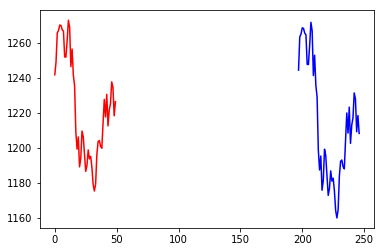

0.393722513115246


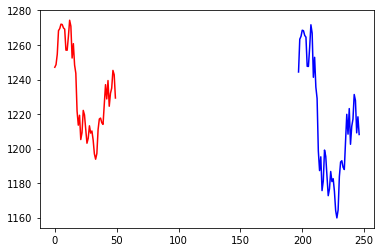

0.8389715567142206


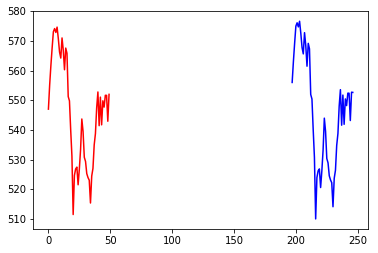

0.7006399618201997


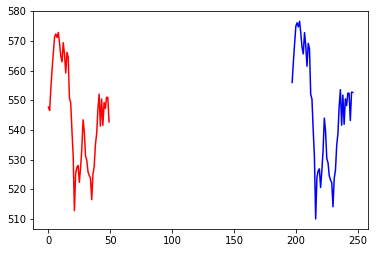

0.8049763861222825


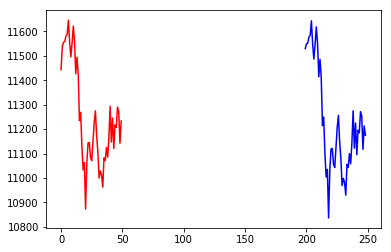

0.6655196810790953


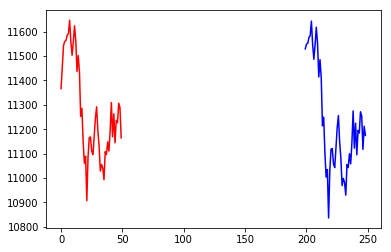

In [284]:
#Application of Lasso Regression Model on training and test data sets for 'X' and 'Y'

from sklearn.linear_model import Lasso
def lsso_reg(data_train_x,data_train_y,data_test_x,data_test_y):
    reg = linear_model.LassoLars(alpha=0.0001)
    reg.fit(data_train_x,data_train_y)
    print(reg.score(data_test_x,data_test_y))
    plt.plot(reg.predict(data_test_x), color = 'red')
    plt.plot(data_test_y, color = 'blue')
    plt.show()

lsso_reg(X_tcs_train1,Y_tcs_train1,X_tcs_test1,Y_tcs_test1)
lsso_reg(X_tcs_train2,Y_tcs_train2,X_tcs_test2,Y_tcs_test2)
lsso_reg(X_infy_train1,Y_infy_train1,X_infy_test1,Y_infy_test1)
lsso_reg(X_infy_train2,Y_infy_train2,X_infy_test2,Y_infy_test2)
lsso_reg(X_niftyit_train1,Y_niftyit_train1,X_niftyit_test1,Y_niftyit_test1)
lsso_reg(X_niftyit_train2,Y_niftyit_train2,X_niftyit_test2,Y_niftyit_test2)